In [35]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Appliance Energy Usage: A Multivariate Time Series Forecasting Example

Experimental data used to create regression models of appliances energy use in a low energy building.
Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).
Original source of the dataset:

http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

In [36]:
## Let's read in the data set:
df = pd.read_csv('energydata_complete.csv',index_col='date',infer_datetime_format=True)

In [37]:
df.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

(array([-2500.,     0.,  2500.,  5000.,  7500., 10000., 12500., 15000.,
        17500., 20000., 22500.]),
 [Text(-2500.0, 0, '2016-05-10 09:30:00'),
  Text(0.0, 0, '2016-01-11 17:00:00'),
  Text(2500.0, 0, '2016-01-29 01:40:00'),
  Text(5000.0, 0, '2016-02-15 10:20:00'),
  Text(7500.0, 0, '2016-03-03 19:00:00'),
  Text(10000.0, 0, '2016-03-21 03:40:00'),
  Text(12500.0, 0, '2016-04-07 12:20:00'),
  Text(15000.0, 0, '2016-04-24 21:00:00'),
  Text(17500.0, 0, '2016-05-12 05:40:00'),
  Text(20000.0, 0, ''),
  Text(22500.0, 0, '')])

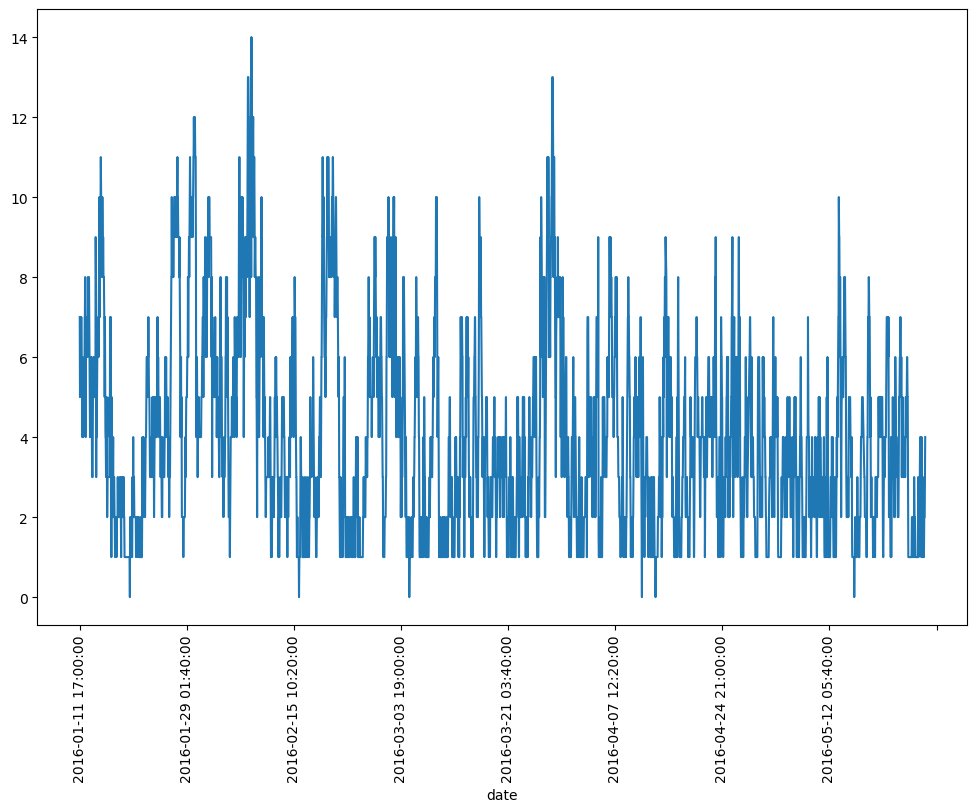

In [39]:
df['Windspeed'].plot(figsize=(12,8))
plt.xticks(rotation=90)

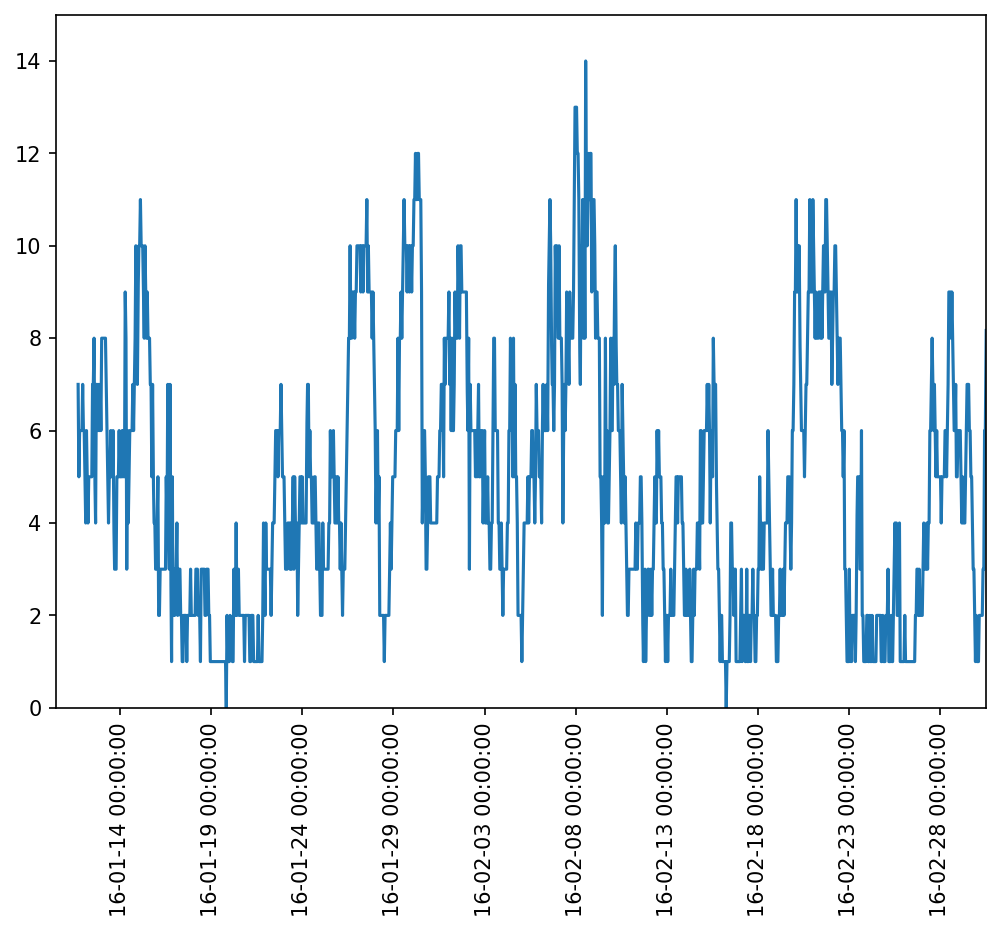

In [40]:
import datetime
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6),dpi=150)
plt.plot(pd.to_datetime(df.index),df['Windspeed'])

plt.ylim(0, 15)

left = datetime.datetime(2016, 1, 10, 12,0,0)
right = datetime.datetime(2016, 3, 1, 12,0,0)

# Format the date into months & days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M:%S')) 

# Change the tick interval
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5)) 

# Puts x-axis labels on an angle
plt.gca().xaxis.set_tick_params(rotation = 90)  

# Changes x-axis range
plt.gca().set_xbound(left, right)

plt.show()

(array([-2500.,     0.,  2500.,  5000.,  7500., 10000., 12500., 15000.,
        17500., 20000., 22500.]),
 [Text(-2500.0, 0, '2016-05-10 09:30:00'),
  Text(0.0, 0, '2016-01-11 17:00:00'),
  Text(2500.0, 0, '2016-01-29 01:40:00'),
  Text(5000.0, 0, '2016-02-15 10:20:00'),
  Text(7500.0, 0, '2016-03-03 19:00:00'),
  Text(10000.0, 0, '2016-03-21 03:40:00'),
  Text(12500.0, 0, '2016-04-07 12:20:00'),
  Text(15000.0, 0, '2016-04-24 21:00:00'),
  Text(17500.0, 0, '2016-05-12 05:40:00'),
  Text(20000.0, 0, ''),
  Text(22500.0, 0, '')])

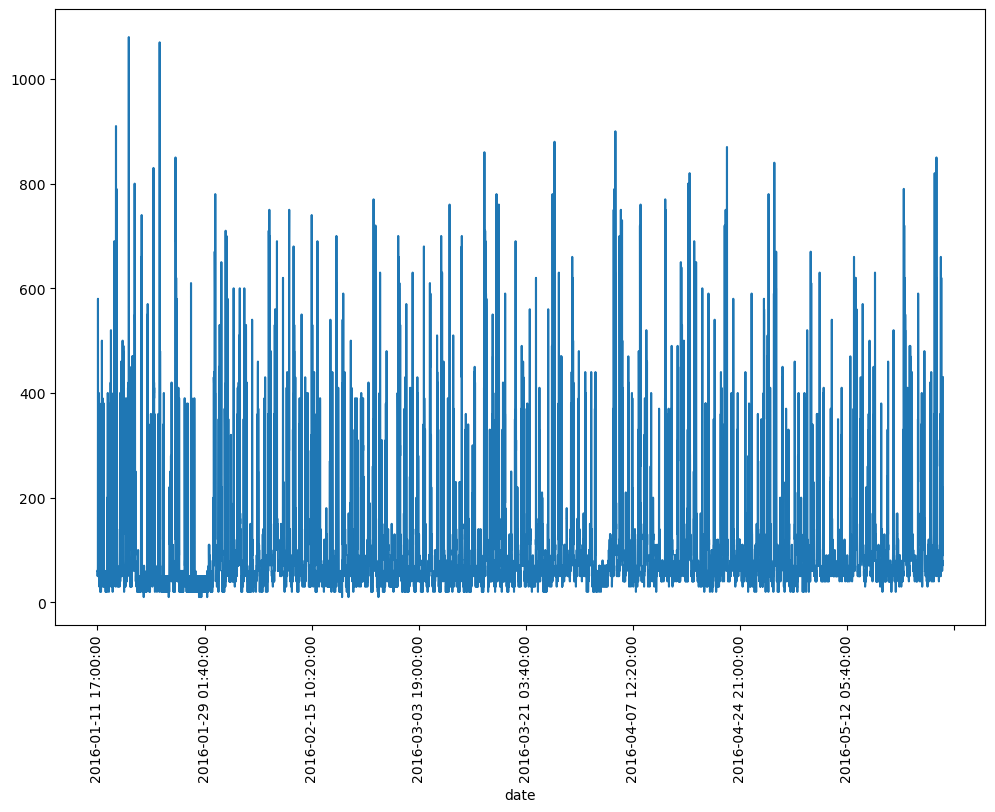

In [41]:
df['Appliances'].plot(figsize=(12,8))
plt.xticks(rotation=90)


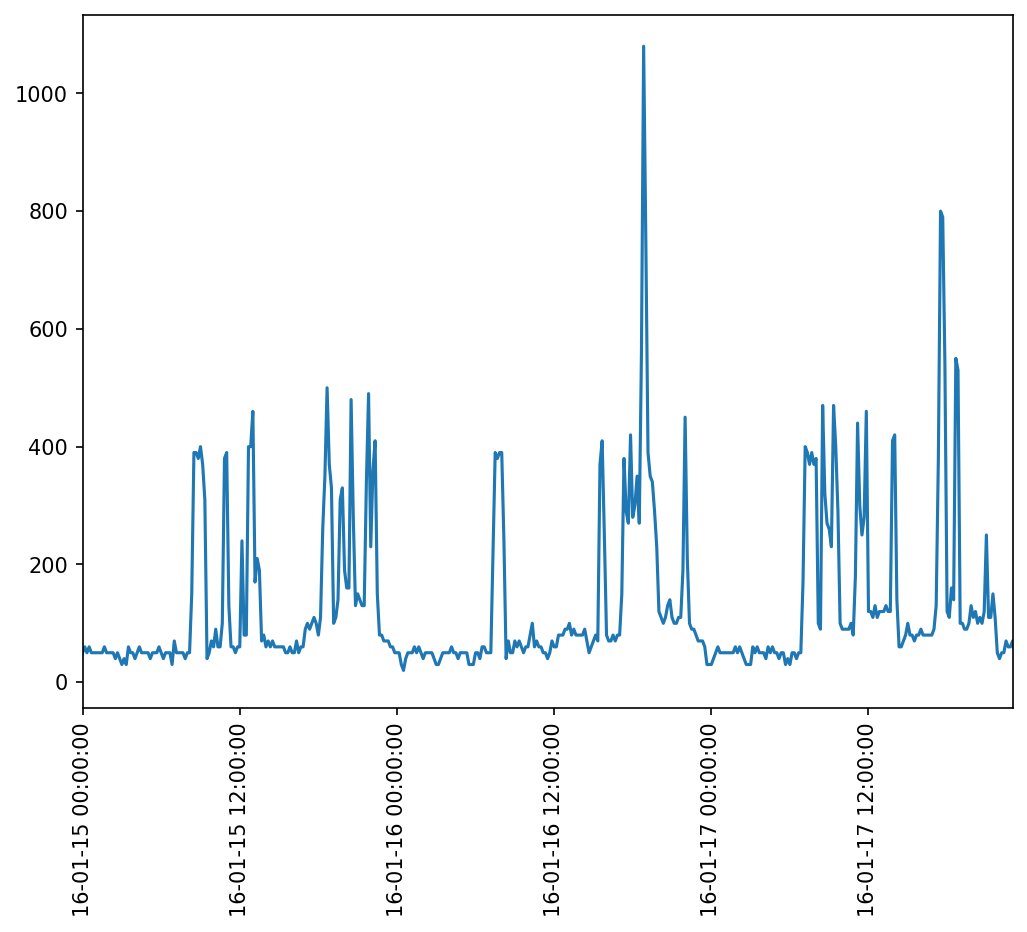

In [55]:
plt.figure(figsize=(8,6),dpi=150)

plt.plot(pd.to_datetime(df.index),df['Appliances'])
plt.xticks(rotation=90)

#plt.ylim(0, 1200)

left = datetime.datetime(2016, 1, 15, 0,0,0)
right = datetime.datetime(2016, 1, 17, 23,0,0)

# Format the date into months & days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M:%S')) 

# Change the tick interval
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5)) 

# Puts x-axis labels on an angle
plt.gca().xaxis.set_tick_params(rotation = 90)  

# Changes x-axis range
plt.gca().set_xbound(left, right)

plt.show()

In [43]:
len(df)

19735

In [44]:
df.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [45]:
df.tail(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


We want to predict just 24 hours into the future, we don't need 3 months of data for that, so let's save some training time and only select the last months data.

In [13]:
df.loc['2016-05-01':]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.200000,38.200000,18.390000,41.400000,23.200000,36.400000,19.73,37.730000,...,19.166667,38.200000,4.300000,763.700000,86.000000,2.000000,40.000000,2.200000,15.310003,15.310003
2016-05-01 00:10:00,60,0,21.150000,38.172500,18.390000,41.500000,23.133333,36.466667,19.70,37.663333,...,19.133333,38.290000,4.283333,763.716667,86.333333,2.166667,38.166667,2.216667,11.240067,11.240067
2016-05-01 00:20:00,50,0,21.133333,38.090000,18.323333,41.500000,23.200000,36.500000,19.70,37.590000,...,19.133333,38.363333,4.266667,763.733333,86.666667,2.333333,36.333333,2.233333,21.808814,21.808814
2016-05-01 00:30:00,50,0,21.100000,38.090000,18.290000,41.500000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.500000,4.250000,763.750000,87.000000,2.500000,34.500000,2.250000,47.000534,47.000534
2016-05-01 00:40:00,60,0,21.100000,38.030000,18.290000,41.560000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.633333,4.233333,763.766667,87.333333,2.666667,32.666667,2.266667,8.059441,8.059441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.70,45.590000,...,23.200000,46.790000,22.733333,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.70,45.590000,...,23.200000,46.790000,22.600000,755.200000,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.70,45.730000,...,23.200000,46.790000,22.466667,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [14]:
df = df.loc['2016-05-01':]

Let's also round off the data, to one decimal point precision, otherwise this may cause issues with our network (we will also normalize the data anyways, so this level of precision isn't useful to us)

In [15]:
df = df.round(2)

In [16]:
len(df)

3853

In [17]:
# How many rows per day? We know its every 10 min
24*60/10

144.0

In [18]:
test_days = 2

In [19]:
test_ind = test_days*144

In [20]:
test_ind

288

In [21]:
#validation and test samples have length of 2 days each
train = df.iloc[:-2*test_ind]
valid = df.iloc[-2*test_ind:-test_ind]
test = df.iloc[-test_ind:]

In [22]:
len(train)

3277

In [23]:
len(valid)

288

In [24]:
len(test)

288

In [25]:
#Scaling data
from sklearn.preprocessing import MinMaxScaler 

scaler=MinMaxScaler()

In [26]:
scaler.fit(train)

MinMaxScaler()

In [27]:
scaled_train = scaler.transform(train)
scaled_valid = scaler.transform(valid)
scaled_test = scaler.transform(test)

In [28]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


length=144  # Length of the output sequences (in number of timesteps), corresponds to one day
#The source of the x points come from the scaled train, the source of the y points also
batch_size=1 #Number of timeseries samples in each batch
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)
validation_generator=TimeseriesGenerator(scaled_valid,scaled_valid,length=length,batch_size=batch_size)
test_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=batch_size)


In [29]:
len(scaled_train)

3277

In [30]:
len(generator) 

3133

In [31]:
# scaled_train

In [32]:
# What does the first batch look like?
X,y = generator[0]

In [59]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03896104 0.         0.13798978 ... 0.14319527 0.75185111 0.75185111]
Predict this y: 
 [[0.03896104 0.         0.30834753 0.29439421 0.16038492 0.49182278
  0.0140056  0.36627907 0.24142857 0.24364791 0.12650602 0.36276002
  0.12       0.28205572 0.06169297 0.15759185 0.34582624 0.39585974
  0.09259259 0.39649608 0.18852459 0.96052632 0.59210526 0.1
  0.58333333 0.13609467 0.4576746  0.4576746 ]]


### Creating the Model

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [61]:
scaled_train.shape #28 corresponds to number of columns to be predicted

(3277, 28)

In [63]:
#define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(100,input_shape=(length,scaled_train.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               51600     
                                                                 
 dense (Dense)               (None, 28)                2828      
                                                                 
Total params: 54,428
Trainable params: 54,428
Non-trainable params: 0
_________________________________________________________________


In [67]:
#Implementing early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)


In [68]:
model.fit(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/10


C:\Users\17573\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


3133/3133 [==============================] - 93s 29ms/step - loss: 0.0123 - val_loss: 0.0104
Epoch 2/10
3133/3133 [==============================] - 88s 28ms/step - loss: 0.0080 - val_loss: 0.0088
Epoch 3/10
3133/3133 [==============================] - 95s 30ms/step - loss: 0.0076 - val_loss: 0.0086
Epoch 4/10
3133/3133 [==============================] - 96s 31ms/step - loss: 0.0074 - val_loss: 0.0080
Epoch 5/10
3133/3133 [==============================] - 97s 31ms/step - loss: 0.0072 - val_loss: 0.0081


In [69]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

<AxesSubplot:>

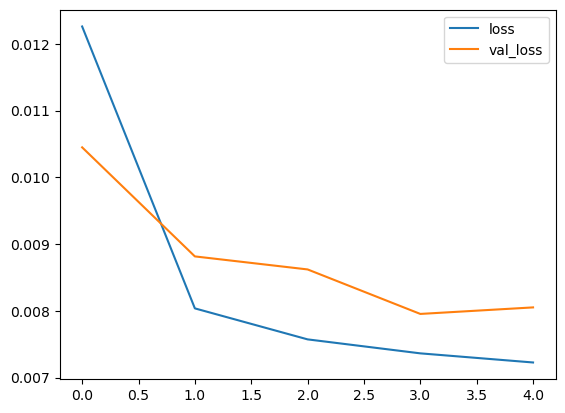

In [70]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [71]:
predictions_scaled = model.predict(test_generator)
true_scaled = scaled_test[length:]  # Align with output

# Inverse transform both
predictions = scaler.inverse_transform(predictions_scaled)
true_values = scaler.inverse_transform(true_scaled)

144/144 [==============================] - 1s 6ms/step


In [72]:
true_values

array([[120.  ,   0.  ,  24.36, ...,   9.1 ,  34.62,  34.62],
       [100.  ,   0.  ,  24.29, ...,   9.2 ,   2.97,   2.97],
       [320.  ,   0.  ,  24.39, ...,   9.3 ,  14.75,  14.75],
       ...,
       [270.  ,  10.  ,  25.5 , ...,  13.27,  29.2 ,  29.2 ],
       [420.  ,  10.  ,  25.5 , ...,  13.23,   6.32,   6.32],
       [430.  ,  10.  ,  25.5 , ...,  13.2 ,  34.12,  34.12]])

In [73]:
predictions

array([[145.88643   ,   0.5669643 ,  24.620604  , ...,   9.070804  ,
         23.306421  ,  23.254435  ],
       [120.2492    ,   0.54983956,  24.603045  , ...,   9.224332  ,
         23.400318  ,  23.220879  ],
       [111.96274   ,   0.40125164,  24.622272  , ...,   9.340686  ,
         23.63328   ,  23.425072  ],
       ...,
       [ 98.92776   ,   0.9350575 ,  25.486927  , ...,  13.057397  ,
         24.166796  ,  24.918474  ],
       [235.05476   ,   6.3422184 ,  25.43667   , ...,  12.518167  ,
         22.761517  ,  23.594973  ],
       [256.46954   ,   7.7911396 ,  25.415028  , ...,  12.351168  ,
         23.126295  ,  23.474396  ]], dtype=float32)

In [75]:
test[length:]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-26 18:10:00,120,0,24.36,42.67,24.70,37.08,27.79,38.53,24.6,40.16,...,22.7,43.59,21.03,755.75,46.50,2.17,38.17,9.10,34.62,34.62
2016-05-26 18:20:00,100,0,24.29,42.07,24.64,37.60,27.86,38.19,24.6,40.09,...,22.7,43.56,20.97,755.70,47.00,2.33,36.33,9.20,2.97,2.97
2016-05-26 18:30:00,320,0,24.39,42.30,24.56,38.20,27.73,37.86,24.6,40.09,...,22.7,43.56,20.90,755.65,47.50,2.50,34.50,9.30,14.75,14.75
2016-05-26 18:40:00,270,0,24.32,42.63,24.59,38.60,27.63,37.89,24.6,40.16,...,22.7,43.70,20.83,755.60,48.00,2.67,32.67,9.40,2.96,2.96
2016-05-26 18:50:00,290,0,24.39,42.53,24.58,39.09,27.83,38.30,24.5,40.20,...,22.7,43.57,20.77,755.55,48.50,2.83,30.83,9.50,3.93,3.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.7,45.59,...,23.2,46.79,22.73,755.20,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.7,45.59,...,23.2,46.79,22.60,755.20,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.7,45.73,...,23.2,46.79,22.47,755.20,56.33,3.67,25.33,13.27,29.20,29.20


In [178]:
true_predictions = pd.DataFrame(data=predictions,columns=test.columns,index=test[length:].index)

In [179]:
true_predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-26 18:10:00,145.886429,0.566964,24.620604,43.032944,25.181723,37.939232,27.571611,38.862946,24.506189,39.485851,...,22.835743,43.442753,20.617233,754.956299,48.893253,2.138927,40.825836,9.070804,23.306421,23.254435
2016-05-26 18:20:00,120.249199,0.549840,24.603045,42.315243,25.040407,37.796413,27.638079,38.677113,24.461754,39.371021,...,22.828417,43.415306,20.622803,754.916687,49.314735,2.319137,38.954170,9.224332,23.400318,23.220879
2016-05-26 18:30:00,111.962738,0.401252,24.622272,41.854317,24.884953,37.829876,27.667212,38.390152,24.485283,39.237236,...,22.852779,43.409237,20.567055,755.028381,51.030735,2.506920,36.897724,9.340686,23.633280,23.425072
2016-05-26 18:40:00,257.947876,0.674794,24.583197,41.792732,24.524801,37.964775,27.533506,38.076000,24.408215,39.226387,...,22.762138,43.246311,20.234713,754.896179,50.443527,2.663079,35.152920,9.056759,21.871775,21.954248
2016-05-26 18:50:00,180.492828,0.960465,24.591890,42.347649,24.703247,38.574902,27.517897,38.150650,24.507885,39.458786,...,22.880184,43.325748,20.275930,754.970825,51.424889,2.878657,32.793648,9.387648,23.951509,23.860760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,96.702072,0.720339,25.512175,46.937584,25.634312,43.269295,27.289719,41.008915,25.068979,44.956879,...,23.209620,46.839760,22.039768,754.287170,58.930016,3.285209,24.859562,13.249463,24.346046,25.064640
2016-05-27 17:30:00,112.592087,0.818577,25.503248,46.568764,25.518341,43.056274,27.189785,41.024242,25.013710,44.877892,...,23.166012,46.797436,21.929195,754.287109,58.338886,3.421502,25.866724,13.093618,23.972746,24.808056
2016-05-27 17:40:00,98.927757,0.935058,25.486927,46.538242,25.449381,43.066875,27.139536,41.133823,25.004932,44.958366,...,23.183887,46.907497,21.796122,754.286926,58.714790,3.558157,26.671419,13.057397,24.166796,24.918474


In [189]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(test['Appliances'][length:], true_predictions['Appliances'])

In [190]:
# Checking per feature MSE
np.sqrt(mse)

85.19171050309258

In [191]:
mean_absolute_error(test['Appliances'][length:], true_predictions['Appliances'])

47.81654643350177

In [192]:
#Where mean value of appliances is the following
test['Appliances'][length:].mean()

132.77777777777777

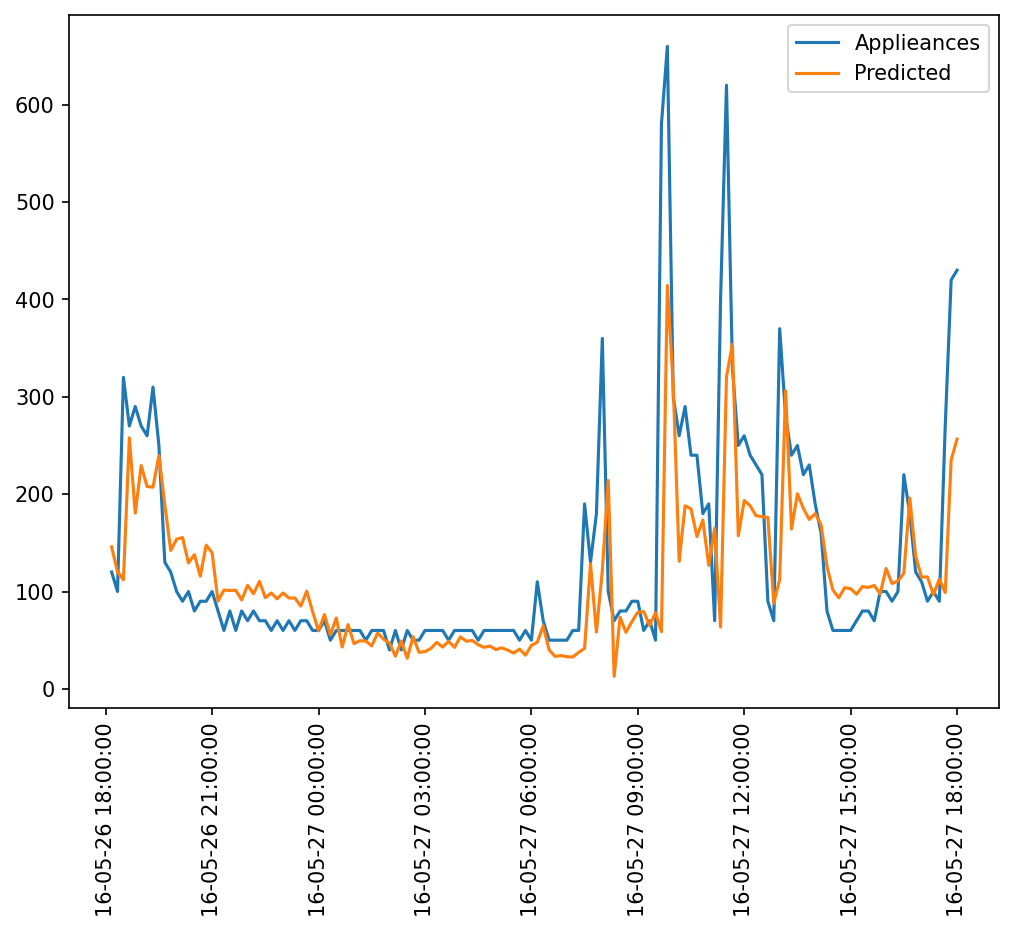

In [212]:
#Plotting together

plt.figure(figsize=(8,6),dpi=150)
plt.plot(pd.to_datetime(test[length:].index),test['Appliances'][length:],label='Applieances')
plt.plot(pd.to_datetime(true_predictions.index),true_predictions['Appliances'],label="Predicted")

left = datetime.datetime(2016, 1, 10, 12,0,0)
right = datetime.datetime(2016, 3, 1, 12,0,0)

# Format the date into months & days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M:%S')) 

# Puts x-axis labels on an angle
plt.gca().xaxis.set_tick_params(rotation = 90)  
plt.legend()
plt.show()

### Saving the model

In [78]:
from tensorflow.keras.models import load_model

In [79]:
model.save("multivariate.h5")